# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date:7/13/21
* Student Name: Connor Nickol
* Student Net ID: can2hr
* This URL: <a URL to the notebook source of this document>
* GitHub Repo URL: https://github.com/cnickol26/DS5100FinalProject

# Three Scenarios 

In [1]:
import numpy as np
import pandas as pd
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer
import matplotlib.pyplot as plt

## Scenario 1: A 2-headed coin

Initializing the coin with 2 faces, heads and tails. Default weight is 1 for each side

In [2]:
die = Die(["H","T"])
die.show_results()

,side,weights
0,H,1.0
1,T,1.0


Initializing 3 coins. All 3 are fair die.

In [3]:
games = Game([[1,1],[1,1],[1,1]])

Rolling the die 1000 times

In [4]:
games.play(1000,die)

Show the results of the rolls

In [5]:
output = games.show()
output

,1,2,3
roll_num,,,
0,T,T,H
1,H,T,T
2,T,T,H
3,T,T,T
4,H,H,H
...,...,...,...
995,T,H,T
996,T,H,H
997,T,H,T


Initialize the analyzer class

In [6]:
analyzer = Analyzer(output,die)

Run the jackpot method which returns all the times where the 3 dies rolled the same face

In [7]:
analyzer.jackpot()

262


,1,2,3
3,T,T,T
4,H,H,H
9,T,T,T
20,T,T,T
21,T,T,T
...,...,...,...
988,H,H,H
990,T,T,T
992,T,T,T
993,T,T,T


Now rerunning with 1 fair dice and 2 unfair dice. Head is weighted 5 times more than tails for the unfair die.

In [8]:
game2 = Game([[1,1],[5,1],[5,1]])

Rolling the die 1000 times

In [9]:
game2.play(1000,die)

Showing the results of the rolls

In [10]:
output2 = game2.show()
output2

,1,2,3
roll_num,,,
0,T,H,H
1,T,H,H
2,H,H,H
3,T,H,H
4,T,H,H
...,...,...,...
995,T,H,H
996,T,H,H
997,T,T,H


Intialize the analyzer class

In [11]:
analyzer = Analyzer(output2,die)

Running the jackpot method to see the number of jackpots

In [12]:
analyzer.jackpot()

332


,1,2,3
2,H,H,H
10,H,H,H
11,H,H,H
13,H,H,H
15,H,H,H
...,...,...,...
983,H,H,H
987,H,H,H
988,H,H,H
994,H,H,H


Creating a dataframe for graphing

In [13]:
first = 282/1000
second = 352/1000
df = pd.DataFrame({"Dice":["Fair","Unfair"],"Result":[first,second]})
df

,Dice,Result
0,Fair,0.282
1,Unfair,0.352


Plotting the percetages as a bar plot

In [14]:
Dice = ["Fair","Unfair"]
Result = [first,second]

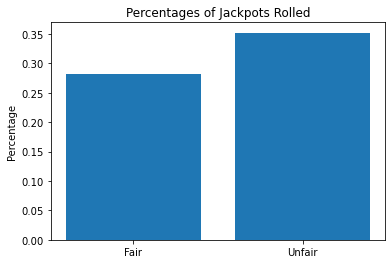

In [15]:
plt.bar(Dice,Result);
plt.title("Percentages of Jackpots Rolled");
plt.ylabel("Percentage");

# Scenario 2: A 6-sided die

Initializing the die

In [16]:
die = Die([1,2,3,4,5,6])
die.show_results()

,side,weights
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,1.0


100000 rolls with all fair dice

In [17]:
games = Game([[1,1,1,1,1,1],[1,1,1,1,1,1],[1,1,1,1,1,1],[1,1,1,1,1,1],[1,1,1,1,1,1]])

In [18]:
games.play(10000,die)

Showing the results

In [19]:
output = games.show()
output

,1,2,3,4,5
roll_num,,,,,
0,4,4,1,4,4
1,3,5,1,4,1
2,1,1,1,6,4
3,1,4,2,5,3
4,5,5,2,3,6
...,...,...,...,...,...
9995,2,4,6,3,5
9996,1,5,3,5,4
9997,4,4,6,4,2


Computing the number of jackpots 

In [20]:
analyze = Analyzer(output,die)

In [21]:
analyze.jackpot()

9


,1,2,3,4,5
2927,5,5,5,5,5
3324,6,6,6,6,6
5308,3,3,3,3,3
7134,3,3,3,3,3
7536,4,4,4,4,4
7687,2,2,2,2,2
8333,3,3,3,3,3
8511,2,2,2,2,2
9698,4,4,4,4,4


Computing the 10 most common combinations

In [22]:
combos = analyze.combo()
fair_combos = combos.sort_values(by = "size",ascending=False).head(10)
fair_combos

,0,1,2,3,4,size
104,1,3,4,5,6,166
75,1,2,3,4,5,158
76,1,2,3,4,6,152
174,2,3,4,5,6,150
84,1,2,4,5,6,142
78,1,2,3,5,6,141
68,1,2,2,5,6,99
73,1,2,3,3,6,97
168,2,3,3,5,6,91
177,2,3,5,5,6,90


Rerunning now with 2 fair die and 3 unfair die

In [23]:
games = Game([[1,1,1,1,1,6],[1,1,1,1,1,6],[6,1,1,1,1,1],[1,1,1,1,1,1],[1,1,1,1,1,1]])

10000 rolls

In [24]:
games.play(10000,die)

Showing the results

In [25]:
output = games.show()
output

,1,2,3,4,5
roll_num,,,,,
0,1,5,1,3,2
1,6,6,1,3,6
2,6,4,3,3,1
3,1,2,1,4,2
4,3,6,1,4,2
...,...,...,...,...,...
9995,3,6,4,1,5
9996,5,6,2,5,2
9997,6,6,1,2,4


Run the jackpot method to count the number of jackpots

In [26]:
analyze = Analyzer(output,die)

In [27]:
analyze.jackpot()

8


,1,2,3,4,5
295,6,6,6,6,6
511,6,6,6,6,6
5446,6,6,6,6,6
5966,6,6,6,6,6
6340,6,6,6,6,6
8446,6,6,6,6,6
8998,6,6,6,6,6
9710,6,6,6,6,6


Counting the top 10 roll combinations

In [28]:
uf_combos = analyze.combo()
unfair_combos = uf_combos.sort_values(by = "size",ascending=False).head(10)
unfair_combos

,0,1,2,3,4,size
107,1,3,5,6,6,239
88,1,2,5,6,6,232
79,1,2,3,6,6,230
104,1,3,4,6,6,226
85,1,2,4,6,6,211
117,1,4,5,6,6,208
50,1,1,4,6,6,175
78,1,2,3,5,6,173
44,1,1,3,6,6,171
84,1,2,4,5,6,170


Graphing the results of the jackpots

In [29]:
first = 8/10000
second = 8/10000
df = pd.DataFrame({"Dice":["All Fair"," 3 Unfair"],"Result":[first,second]})
df

,Dice,Result
0,All Fair,0.0008
1,3 Unfair,0.0008


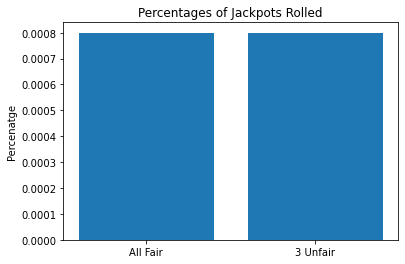

In [30]:
Fairness = ["All Fair","3 Unfair"]
result = [first,second]
plt.bar(Fairness,result);
plt.title("Percentages of Jackpots Rolled");
plt.ylabel("Percenatge");

Graphing the top 10 combinations for fair and unfair die

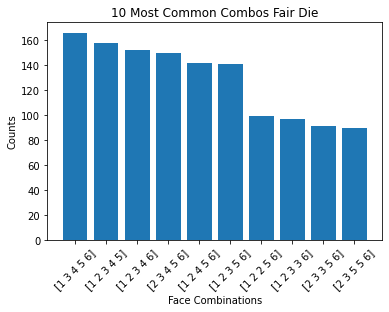

In [31]:
list_combos = [fair_combos.values[row][0:5] for row in range(0,len(fair_combos))]
list_combos = [''.join(str(x)) for x in list_combos]
counts = [fair_combos.values[row][5] for row in range(0,len(fair_combos))]
plt.bar(list_combos,counts);
plt.xticks(rotation=45);
plt.title("10 Most Common Combos Fair Die");
plt.xlabel("Face Combinations");
plt.ylabel("Counts");

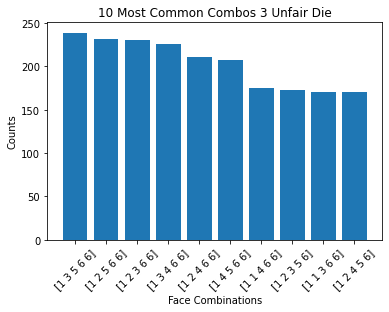

In [32]:
list_combos = [unfair_combos.values[row][0:5] for row in range(0,len(unfair_combos))]
list_combos = [''.join(str(x)) for x in list_combos]
counts = [unfair_combos.values[row][5] for row in range(0,len(unfair_combos))]
plt.bar(list_combos,counts);
plt.xticks(rotation=45);
plt.title("10 Most Common Combos 3 Unfair Die");
plt.xlabel("Face Combinations");
plt.ylabel("Counts");

# Scenario 3: Letters of the Roman Alphabet

Initalize the die with the letters of the alphabet as faces

In [33]:
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 
           'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

In [34]:
die = Die(letters)

Letter frequencies

In [35]:
freq = [8.4966,2.0720,4.5388,3.3844,11.1607,1.8121,2.4705,
        3.0034,7.5448,.1965,1.1016,5.4893,3.0129,6.6544,7.1635,
        3.1671,.1962,7.5809,5.7351,6.9509,3.6308,1.0074,1.2899,
        0.2902,1.7779,.2722]

Initializing 5 die all equal weights

In [36]:
games = Game([freq,freq,freq,freq,freq])

Rolling the 5 die 1000 times

In [37]:
games.play(1000,die)

Showing the weights for each letter

In [38]:
die.show_results()

,side,weights
0,a,8.4966
1,b,2.0720
2,c,4.5388
3,d,3.3844
4,e,11.1607
5,f,1.8121
6,g,2.4705
7,h,3.0034
8,i,7.5448
9,j,0.1965


Showing the results of the 1000 rolls

In [39]:
output = games.show()
output

,1,2,3,4,5
roll_num,,,,,
0,g,r,s,d,y
1,w,t,e,n,i
2,h,e,p,g,d
3,n,b,i,e,s
4,a,n,m,o,r
...,...,...,...,...,...
995,o,l,c,u,e
996,u,i,r,e,a
997,f,a,i,g,u


Using a list of possible wordle answers to see how many valid words came from my rolls

wordle = pd.read_csv("valid_guesses.csv")
wordle

Checking to see how many valid wordle guesses were in my random output

In [45]:
word_combos = [output.values[row][0:5] for row in range(0,len(output))]
word_combos = [''.join(x) for x in word_combos]
valid_words = []
for word in word_combos:
    if wordle['word'].str.contains(word).any():
        valid_words.append(word)
valid_words

['biter', 'tawts', 'sasse', 'slipe']

4 out of 1000 were valid guesses

Running the jackpot method out of curiosity

In [49]:
analyze = Analyzer(output,die)

In [50]:
analyze.jackpot()

0


""


No jackpots